In [1]:
import qiskit 
import pennylane as qml 
import pennylane_qiskit as qcml

In [2]:
qc = qiskit.QuantumCircuit(2)
qc.rz(0.543, [0])
qc.cx(0, 1)
my_circuit = qcml.from_qiskit(qc)

In [14]:
display(my_circuit)

<function pennylane_qiskit.converter.load.<locals>._function(params: dict = None, wires: list = None)>

In [4]:
dev = qml.device('default.qubit', wires=2, shots=1000)

In [5]:
@qml.qnode(dev)
def circuit(x):
    qml.RX(x, wires=1)
    my_circuit(wires=(1, 0))
    return qml.expval(qml.PauliZ(0))

In [6]:
circuit(0.5)

array(0.884)

In [7]:
print(qml.draw(circuit)(0.5))

0: ─────────────────────╭X─┤  <Z>
1: ──RX(0.50)──RZ(0.54)─╰●─┤     


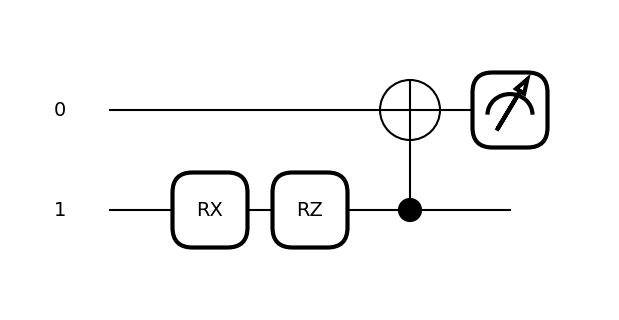

In [8]:
import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit)(0.5)
plt.show()

## from qasm

In [26]:
qasm_ckt = 'OPENQASM 2.0;' \
           'include "qelib1.inc";' \
           'qreg q[2];' \
           'rz(0.543) q[0];' \
           'cx q[0],q[1];' 
my_circuit = qcml.from_qasm(qasm_ckt)

In [30]:
@qml.qnode(dev)
def second_circuit(x):
    qml.RX(x, wires=1)
    my_circuit(wires=(1, 0))
    return qml.expval(qml.PauliZ(0))

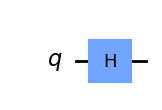

In [24]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit.from_qasm_str("""
OPENQASM 2.0;
include "qelib1.inc";
qreg q[1];
h q[0];
""")
circuit.draw('mpl')

In [25]:
qc.qasm()

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\nrz(0.543) q[0];\ncx q[0],q[1];\n'

In [31]:
second_circuit(0.5)

array(0.886)